## Import packages

In [1]:
import numpy as np
import simulators.jla_supernovae.jla_simulator as jla
import pydelfi.ndes as ndes
import pydelfi.delfi_edit as delfi
import pydelfi.score as score
import pydelfi.priors as priors
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
%matplotlib inline

In [2]:
import pylab as plt
import pyccl as ccl
import scipy
from scipy.interpolate import interp1d

import matplotlib
%matplotlib inline

import time
import importlib

print("CCL version you are using:",ccl.__version__)

CCL version you are using: 2.1.0


In [3]:
font_config = {"size" : 10,
               "family" : "serif"}

matplotlib.rc("font", **font_config)
matplotlib.rc("text", usetex=True)
# Move title to make space for exponents of y axis
matplotlib.rc("axes", titlepad=5) 
matplotlib.rc("axes", titlesize="medium") 

# Make the figures bigger in the notebook
matplotlib.rc("figure", dpi=150)

color_map = plt.get_cmap("tab10")

paper_textwidth = 7.125
fig_size = (paper_textwidth/2, 2.6)

plot_adjust = dict(left=0.2, top=0.9, bottom=0.2)

In [64]:
import simulators.mass_function_n_counts.simulator_trapz_tinker_2params as n_counts_simulator
importlib.reload(n_counts_simulator)

<module 'simulators.mass_function_n_counts.simulator_trapz_tinker_2params' from '/home/aizhana/pydelfi_cluster_counts/examples/simulators/mass_function_n_counts/simulator_trapz_tinker_2params.py'>

In [65]:
log10masses = np.linspace(14, 15.5, num = 4)
z_min = np.linspace(0.1, 0.9, num = 5)
z_max = np.linspace(0.2, 1.0, num = 5)
log10masses_2d = np.stack((log10masses[:-1], log10masses[1:]))

In [66]:
lower = np.array([0.1125, 0.65])
upper = np.array([0.1275, 0.85])
prior = priors.Uniform(lower, upper)

In [67]:
theta_fiducial = np.array([0.1197, 0.76])

In [68]:
N_countsSimulator = n_counts_simulator.Model(log10masses, z_min, z_max)
N_counts = N_countsSimulator.N_counts
#N_counts = N_countsSimulator.simulation(theta_fiducial, 1)
N_counts

array([2.01375933e+04, 6.15932449e+04, 7.92155533e+04, 7.05138175e+04,
       5.00615557e+04, 2.66747919e+03, 6.24078572e+03, 5.83486556e+03,
       3.60888575e+03, 1.70548356e+03, 1.21730998e+02, 1.76398359e+02,
       9.32196154e+01, 2.99497101e+01, 6.76248388e+00])

In [9]:
np.round(N_counts).astype(int)

array([20138, 61593, 79216, 70514, 50062,  2667,  6241,  5835,  3609,
        1705,   122,   176,    93,    30,     7])

In [10]:
t1 = time.process_time()
N_counts = N_countsSimulator.simulation(theta_fiducial, 1)
t2 = time.process_time()
print('time per 1 sim: '+ str(t2-t1))

time per 1 sim: 0.4909161059999998


In [11]:
N_counts

array([20104, 61296, 78932, 70436, 50010,  2619,  6222,  5741,  3576,
        1761,   103,   162,    78,    43,     8])

## Version 2

(1) Compute fiducial number of counts N for different redshift bins (for a range of masses, 14 to 15.5)

(2) Draw N samples from joint redshift-mass distribution

(3) Create mock catalogue

In [12]:
import simulators.mass_function_n_counts.simulator_trapz_tinker_2params_mock_catalogue_v2_og_bins_2 as n_counts_simulator_2

In [13]:
importlib.reload(n_counts_simulator_2)

<module 'simulators.mass_function_n_counts.simulator_trapz_tinker_2params_mock_catalogue_v2_og_bins_2' from '/home/aizhana/pydelfi_cluster_counts/examples/simulators/mass_function_n_counts/simulator_trapz_tinker_2params_mock_catalogue_v2_og_bins_2.py'>

In [14]:
log10masses = np.linspace(14, 15.5, num = 2)
z_min = np.linspace(0.1, 0.9, num = 5)
z_max = np.linspace(0.2, 1.0, num = 5)
log10masses_2d = np.stack((log10masses[:-1], log10masses[1:]))

In [15]:
import simulators.mass_function_n_counts.simulator_trapz_tinker_2params_mock_catalogue_v2_og_bins_3 as n_counts_simulator_3
N_countsSimulator3 = n_counts_simulator_3.Model(log10masses, z_min, z_max)

In [16]:
import simulators.mass_function_n_counts.simulator_trapz_tinker_2params_mock_catalogue_v2_small_z_bins as n_counts_simulator_4
N_countsSimulator4 = n_counts_simulator_4.Model(log10masses, z_min, z_max)

In [17]:
import simulators.mass_function_n_counts.simulator_trapz_tinker_2params_mock_catalogue_v2_change_steps as n_counts_simulator_5
importlib.reload(n_counts_simulator_5)
N_countsSimulator_trial = n_counts_simulator_5.Model(log10masses, z_min, z_max)

In [18]:
N_countsSimulator2 = n_counts_simulator_2.Model(log10masses, z_min, z_max)
N_by_z = N_countsSimulator2.N_counts[0]
N_by_z.astype(int)

array([22926, 68010, 85143, 74152, 51774])

In [19]:
cosmo_ccl = N_countsSimulator2.cosmo(theta_fiducial)

In [86]:
N_counts1 = np.load('N_counts1.npy') # from previous simulator  
N_counts2 = np.load('N_counts2.npy') # 1k by 10k grid, ~ 11s
N_counts3 = np.load('N_counts3.npy') # 1k by 1k grid, ~ 1.3s
N_counts8 = np.load('N_counts8.npy') # 1k X 20k grid, ~ 21 S
N_counts9 = np.load('N_counts9.npy') # 2k by 10k grid, ~ 22 s

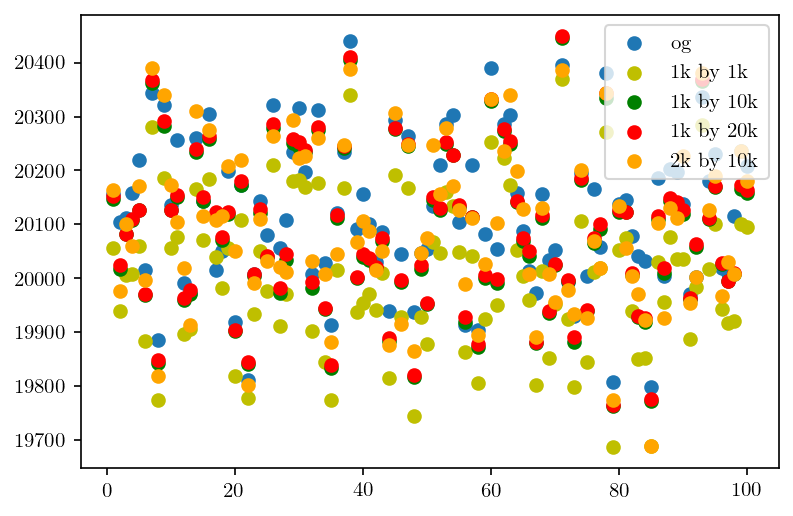

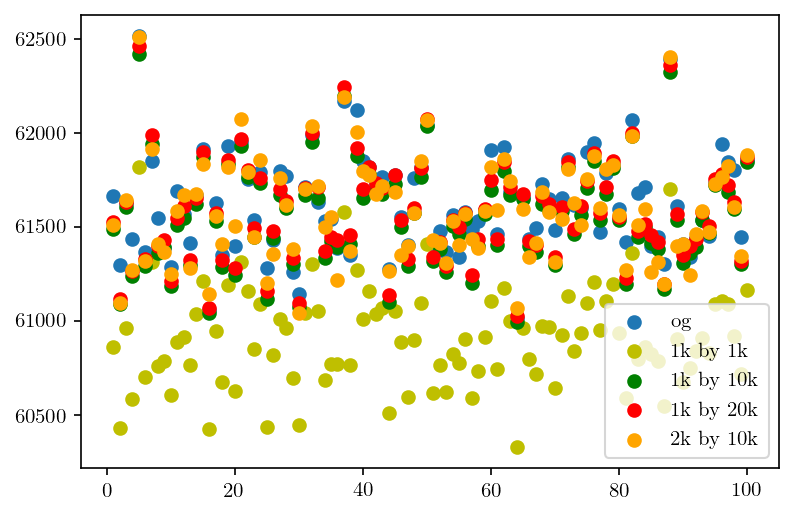

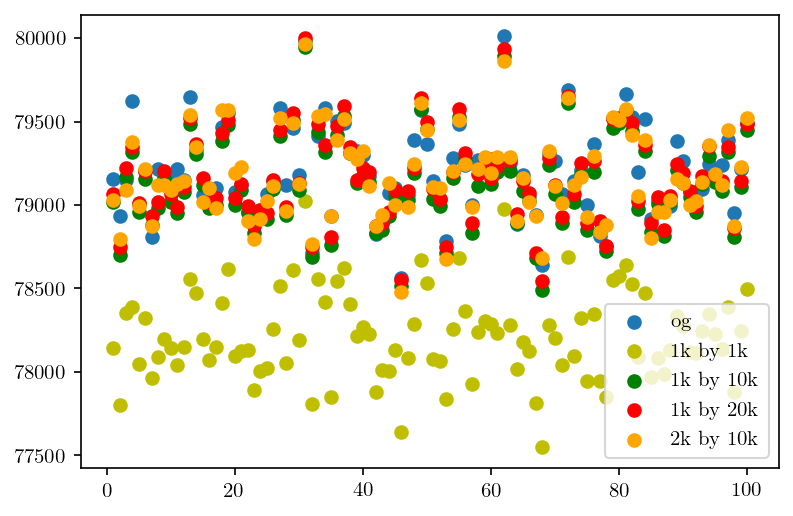

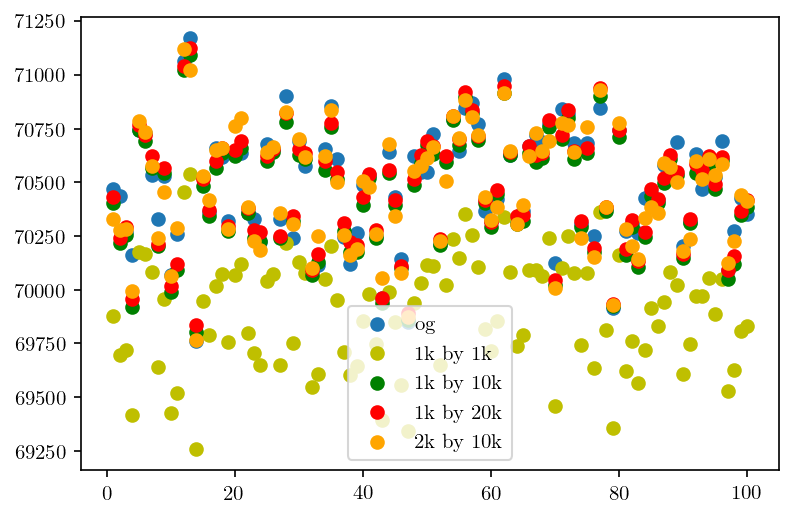

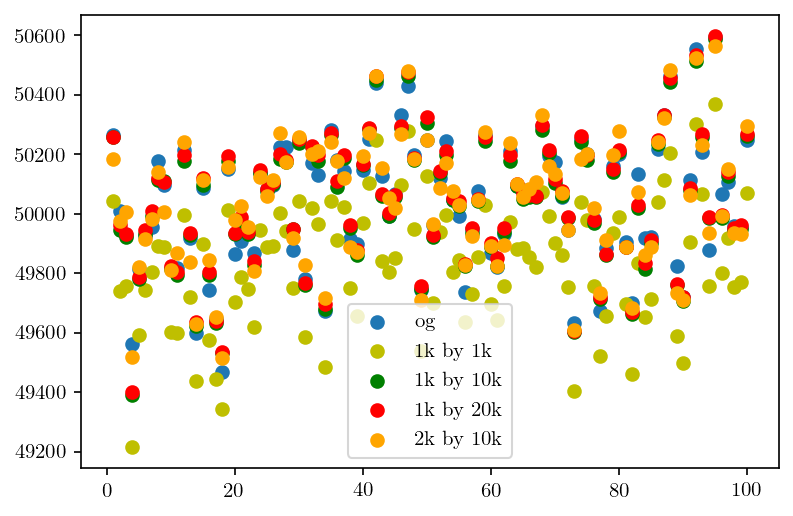

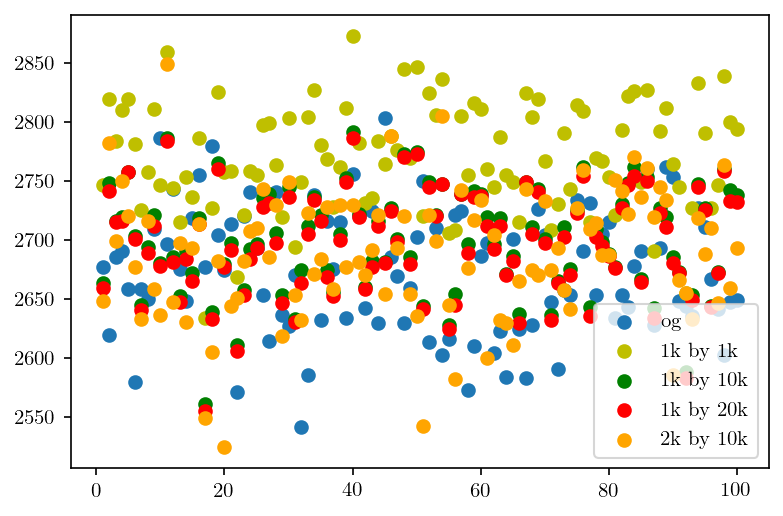

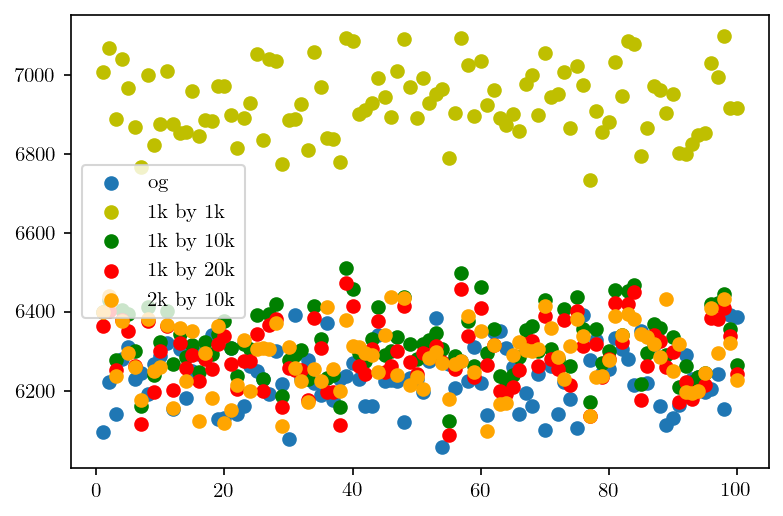

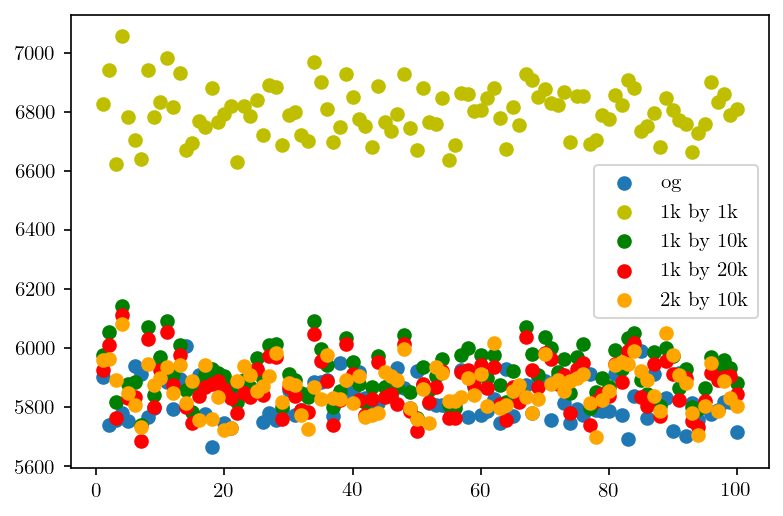

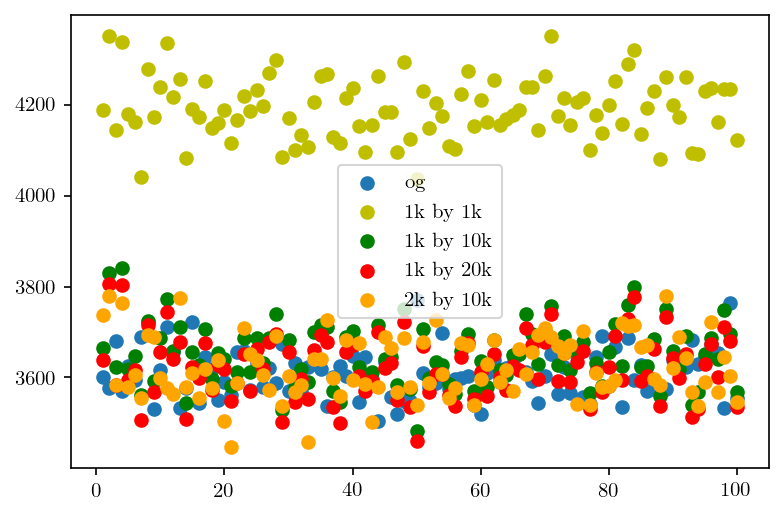

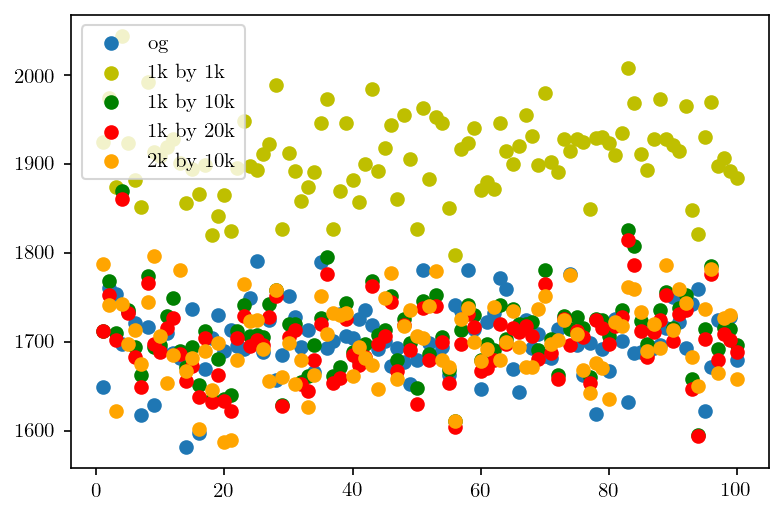

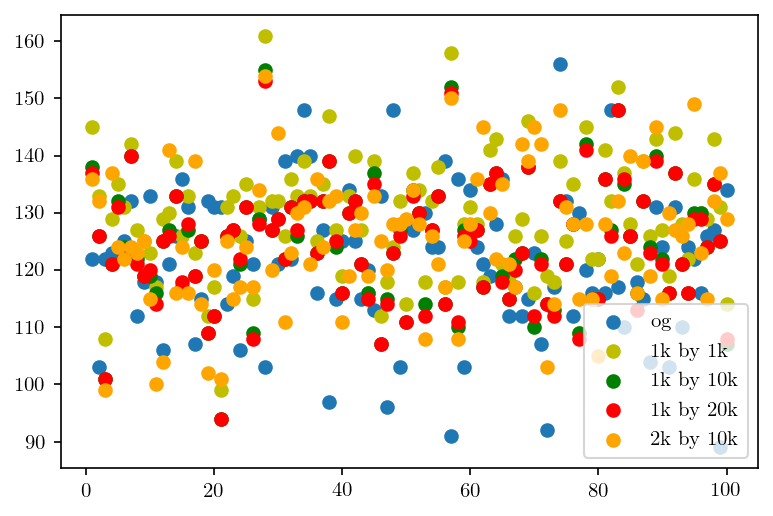

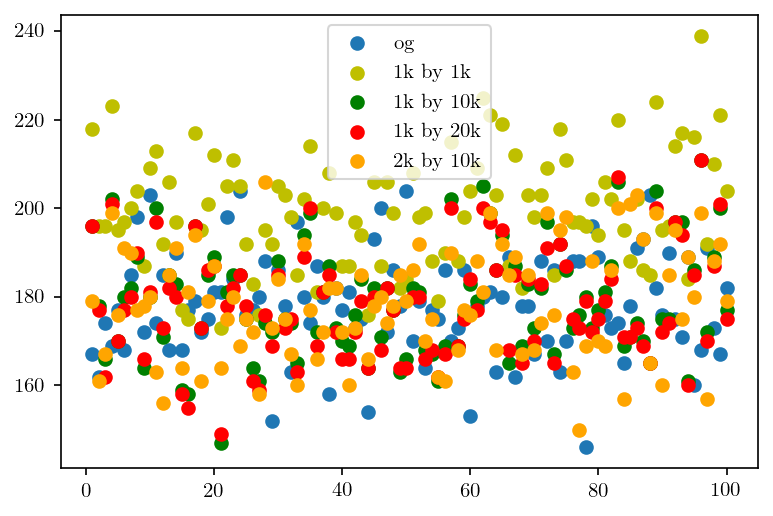

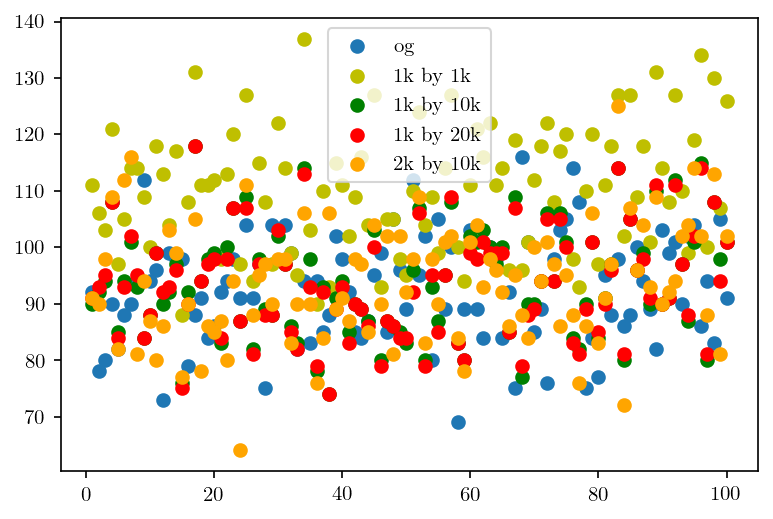

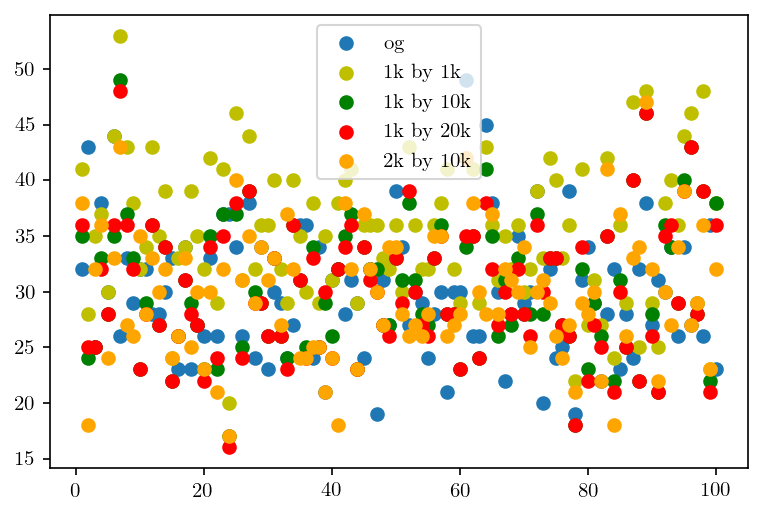

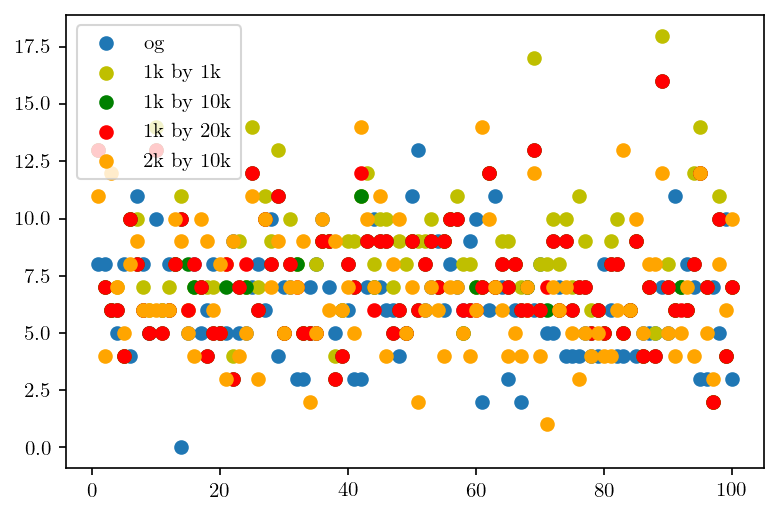

In [87]:
seeds = np.linspace(1, 100, num = 100)
for i in range(N_counts1.shape[1]):
    plt.figure()
    plt.scatter(seeds, N_counts1[:, i], label = 'og')
    plt.scatter(seeds, N_counts3[:, i], label = '1k by 1k', c = 'y')
    plt.scatter(seeds, N_counts2[:, i], label = '1k by 10k', c = 'g')
    plt.scatter(seeds, N_counts8[:, i], label = '1k by 20k', c = 'r')
    plt.scatter(seeds, N_counts9[:, i], label = '2k by 10k', c = 'orange')
    plt.legend(loc = 'best')

In [90]:
N1_mean = np.mean(N_counts1, axis = 0)
N2_mean = np.mean(N_counts2, axis = 0)
N3_mean = np.mean(N_counts3, axis = 0)
N8_mean = np.mean(N_counts8, axis = 0)
N9_mean = np.mean(N_counts9, axis = 0)

In [91]:
for i in range(len(N_counts)):
    print('N fiducial: ' + str(N_counts[i]))
    print('N1 mean: ' + str(N1_mean[i]))
    print('N3 mean: ' + str(N3_mean[i]))
    print('N2 mean: ' + str(N2_mean[i]))
    print('N8 mean: ' + str(N8_mean[i]))
    print('N9 mean: ' + str(N9_mean[i]))
    print()

N fiducial: 20137.593260359627
N1 mean: 20119.83
N3 mean: 20008.26
N2 mean: 20082.79
N8 mean: 20087.47
N9 mean: 20094.63

N fiducial: 61593.24494508852
N1 mean: 61624.92
N3 mean: 60913.57
N2 mean: 61542.44
N8 mean: 61578.17
N9 mean: 61580.79

N fiducial: 79215.55333001258
N1 mean: 79202.17
N3 mean: 78219.82
N2 mean: 79118.93
N8 mean: 79163.58
N9 mean: 79171.53

N fiducial: 70513.81747226561
N1 mean: 70480.94
N3 mean: 69892.09
N2 mean: 70439.31
N8 mean: 70466.85
N9 mean: 70465.65

N fiducial: 50061.555726726125
N1 mean: 50038.32
N3 mean: 49833.18
N2 mean: 50031.99
N8 mean: 50042.4
N9 mean: 50040.93

N fiducial: 2667.479185049145
N1 mean: 2673.3
N3 mean: 2770.54
N2 mean: 2700.55
N8 mean: 2696.15
N9 mean: 2687.84

N fiducial: 6240.785719539374
N1 mean: 6235.0
N3 mean: 6930.56
N2 mean: 6322.15
N8 mean: 6287.59
N9 mean: 6284.59

N fiducial: 5834.8655552435885
N1 mean: 5828.21
N3 mean: 6799.87
N2 mean: 5917.03
N8 mean: 5872.84
N9 mean: 5864.7

N fiducial: 3608.8857503087393
N1 mean: 3609.25
